C:\Users\82105\AppData\Local\Temp\ipykernel_7396\3080810311.py:30: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.mean())
C:\Users\82105\AppData\Local\Temp\ipykernel_7396\3080810311.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_one=grouped_one.mean()
C:\Users\82105\AppData\Local\Temp\ipykernel_7396\3080810311.py:49: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the f

       age        salary  is_married  is_hereditary     weight      height  \
age                                                                          
2.0    2.0  1.150700e+07         0.0            0.0  63.946479  178.733256   
5.0    5.0  6.971969e+06         0.0            0.0  53.107190  153.899193   
7.0    7.0  9.484299e+06         0.0            0.0  60.398564  164.434156   
8.0    8.0  5.199902e+06         0.0            0.0  62.713771  183.169253   
9.0    9.0  1.286484e+07         0.0            0.0  52.372711  170.078608   
...    ...           ...         ...            ...        ...         ...   
71.0  71.0  7.616421e+06         1.0            0.5  54.398652  167.251178   
73.0  73.0  5.728047e+06         1.0            0.0  55.486466  153.996666   
74.0  74.0  7.043634e+06         1.0            0.0  57.705536  168.003602   
75.0  75.0  3.885216e+06         1.0            0.0  89.228850  170.571763   
77.0  77.0  9.540787e+06         1.0            0.0  48.435989  

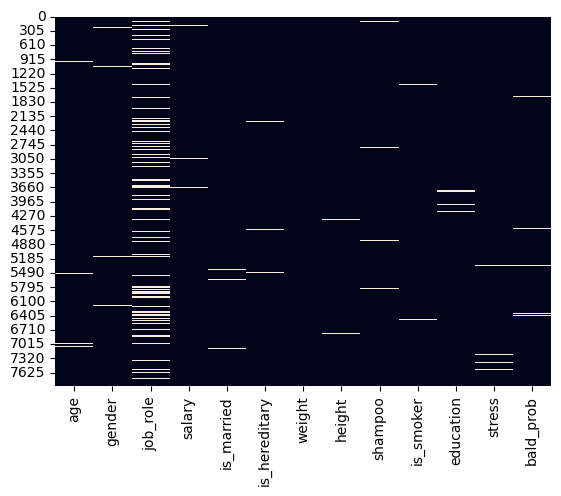

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score


file_path = 'bald_probability.csv'

df=pd.read_csv('bald_probability.csv')
df = df.drop('province', axis=1)
"""df['job_role'].isnull().sum()
df['gender'].isnull().sum()
df['salary'].isnull().sum()
df['is_married'].isnull().sum()
df['is_hereditary'].isnull().sum()
df['weight'].isnull().sum()
df['height'].isnull().sum()
df['shampoo'].isnull().sum()
df['is_smoker'].isnull().sum()
df['education'].isnull().sum()
df['stress'].isnull().sum()
df['age'].isnull().sum()
"""
%matplotlib inline
sns.heatmap(df.isnull(),cbar=False)

df=df.fillna(df.mean())
df.loc[df['education'] != df['education'], 'education'] = 'Senior High School'
df.loc[df['gender'] != df['gender'], 'gender'] = 'male'
df.loc[df['shampoo'] != df['shampoo'], 'shampoo'] = 'Shoulder & Head'
df.loc[df['job_role'] != df['job_role'], 'job_role'] = 'Jobless'

#education_map={'Elementary School':0,'Junior High School':1,'Senior High School':2,'Bachelor Degree':3,'Doctoral Degree':4,'Magister Degree':5}
#df['education']=df['education'].map(education_map)



grouped_one=df.groupby(['is_hereditary'])    
average_one=grouped_one.mean()
print(average_one)
print(type(average_one))

# 유전력이 있으면 걸릴 확률이 더 높음
print('\n')
grouped_two=df.groupby(['is_married'])
std_all=grouped_two.std()
print(std_all)
print('\n')
#결혼한 사람이 결혼하지 않은 사람에 비해 나이의 표준편차가 크다.


grouped_three=df.groupby(['age'])
agg_grouped = grouped_three.apply(lambda x : x.mean())
print(agg_grouped) 
#이 데이터를 통해 나이가 많이 들수록 탈모에 걸릴 확률이 높다는 것을 알 수 있다.


